# Classifying CIFAR10 Dataset Using KNN Algorithm

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import math 
import random
%matplotlib inline

# Loading Train Data

In [2]:
DATA_DIR= r'C:\Users\Asus\Documents\CVPR\CIFAR10\train'
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

train_data=[]

for c in CATEGORIES:
    path=os.path.join(DATA_DIR,c)
    class_num=CATEGORIES.index(c) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            train_data.append([img_array,class_num]) 
        except Exception as e:  
            pass
            
print(len(train_data))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:01<00:00, 3103.98it/s]

50000


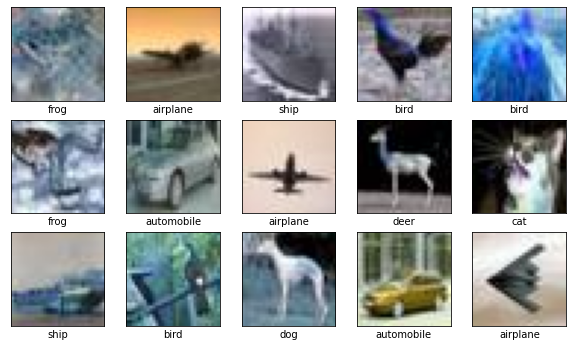

In [3]:
import random
random.shuffle(train_data)

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_data[i][0])
    plt.xlabel(CATEGORIES[train_data[i][1]])
plt.show()

# Loading Test Data

In [4]:
DATA_DIR= r'C:\Users\Asus\Documents\CVPR\CIFAR10\test'
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

test_data=[]

for c in CATEGORIES:
    path=os.path.join(DATA_DIR,c)
    class_num=CATEGORIES.index(c) 
    
    
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            
            test_data.append([img_array,class_num]) 
        except Exception as e:  
            pass
            
print(len(test_data))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1969.88it/s]

10000


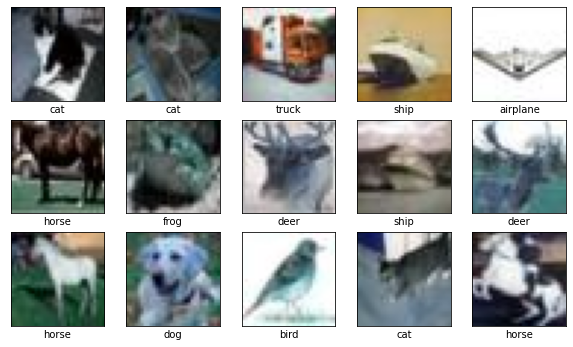

In [5]:
import random
random.shuffle(test_data)

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i][0])
    plt.xlabel(CATEGORIES[test_data[i][1]])
plt.show()

# KNN - Manhanttan Distance Calculation

In [6]:
def l1_distance(test,k):    
    x=[]

    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                print(CATEGORIES[train_data[i][1]])
                break

# Prediction on a single test image

In [7]:
def l1_distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(train_data)):
        x.append(np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(train_data))): #for i in tqdm(range(0,len(train_data))):
            if np.sum(abs(np.subtract(train_data[i][0].flatten(),test.flatten())))==x[j]:
                #print(CATEGORIES[train_data[i][1]])
                prediction_array.append(train_data[i][1])
                break

    #print(prediction_array)
    
    check = []
    for i in range(0, len(CATEGORIES)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(CATEGORIES)):
        if check[final_prediction] == max(check):
            #print('Prediction : ' +CATEGORIES[final_prediction])
            return final_prediction

In [8]:
Single_Prediction = l1_distance_accuracy(test_data[1036][0],5)    #K =5
print('Prediction : ' + CATEGORIES[Single_Prediction])
print('Correct :' + CATEGORIES[test_data[1036][1]])

Prediction : airplane
Correct :airplane


Text(0.5, 0, 'airplane')

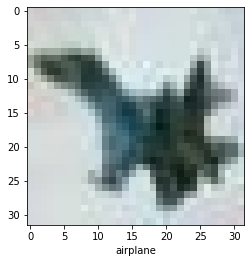

In [9]:
plt.imshow(test_data[1036][0],cmap=plt.cm.gray)
plt.xlabel(CATEGORIES[test_data[1036][1]])

# Calculating Accuracy for K values

In [10]:
def single_accuracy(k, test_data_number):
    print('Calculating...   (k = '+str(k)+')')
    accuracy_count = 0
    for j in tqdm(range(0, test_data_number)): #for j in range(0, len(test_data)):
        #print('------------')
        if l1_distance_accuracy(test_data[j][0], k) == test_data[j][1]:
            accuracy_count = accuracy_count + 1
            #print('CORRECT PREDICTION COUNT = ' + str(accuracy_count))
            
        
        #print('Correct : ' + CATEGORIES[test_data[j][1]])
        #print('------------')

    accuracy = (accuracy_count*100)/(j+1) #accuracy = (accuracy_count*100)/len(test_data)
    
    print('-------------------------------------------------------')
    print('\t\tAccuracy when k = '+ str(k) +' is '+ str(accuracy))
    print('-------------------------------------------------------')
    
    return accuracy

In [11]:
#k = 20

#accuracy_array = []

#for i in range(0, k):  
#    accuracy_array.append(single_accuracy(i+1, len(test_data)))

In [12]:
accuracy_array = []

In [13]:
k = 1  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 1)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [4:10:30<00:00,  1.50s/it]

-------------------------------------------------------
		Accuracy when k = 1 is 24.34
-------------------------------------------------------
[24.34]


In [14]:
k = 2  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 2)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [4:44:01<00:00,  1.70s/it]

-------------------------------------------------------
		Accuracy when k = 2 is 21.79
-------------------------------------------------------
[24.34, 21.79]


In [15]:
k = 3  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 3)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [5:40:14<00:00,  2.04s/it]

-------------------------------------------------------
		Accuracy when k = 3 is 23.51
-------------------------------------------------------
[24.34, 21.79, 23.51]


In [16]:
k = 4  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 4)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [5:47:29<00:00,  2.08s/it]

-------------------------------------------------------
		Accuracy when k = 4 is 23.96
-------------------------------------------------------
[24.34, 21.79, 23.51, 23.96]


In [17]:
k = 5  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 5)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [9:52:56<00:00,  3.56s/it]

-------------------------------------------------------
		Accuracy when k = 5 is 24.47
-------------------------------------------------------
[24.34, 21.79, 23.51, 23.96, 24.47]


In [18]:
k = 6  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 6)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [9:29:00<00:00,  3.41s/it]

-------------------------------------------------------
		Accuracy when k = 6 is 24.45
-------------------------------------------------------
[24.34, 21.79, 23.51, 23.96, 24.47, 24.45]


In [19]:
k = 7  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 7)


100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [9:41:12<00:00,  3.49s/it]

-------------------------------------------------------
		Accuracy when k = 7 is 24.42
-------------------------------------------------------
[24.34, 21.79, 23.51, 23.96, 24.47, 24.45, 24.42]


In [20]:
k = 8  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 8)


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [11:58:54<00:00,  4.31s/it]

-------------------------------------------------------
		Accuracy when k = 8 is 24.43
-------------------------------------------------------
[24.34, 21.79, 23.51, 23.96, 24.47, 24.45, 24.42, 24.43]


In [ ]:
k = 9  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]

Calculating...   (k = 9)


  4%|███▏                                                                       | 417/10000 [52:30<10:17:49,  3.87s/it]

In [ ]:
k = 10  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 11  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 12  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 13  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 14  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 15  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 16  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 17  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 18  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 19  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [ ]:
k = 20  
accuracy_array.append(single_accuracy(k, len(test_data)))

print(accuracy_array)

In [21]:
k_array = list(range(1, k+1))
print(k_array)

[1, 2, 3, 4, 5, 6, 7, 8]


# Plotting Accuracy (%) VS K Graph

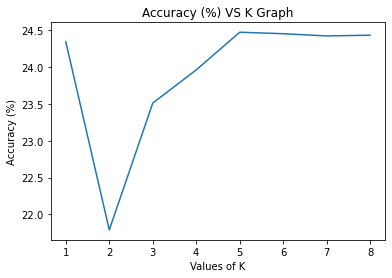

In [22]:
plt.xlabel('Values of K')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy (%) VS K Graph')
plt.plot(k_array, accuracy_array)

# Finding an Alternative Way

# Using Pickle to Serialize the Algorithm

In [23]:
x_train = []
y_train = []
x_test = []
y_test = []
IMG_SIZE = 32

for features, label in train_data:
    x_train.append(features)
    y_train.append(label)
    #print(" - ")
    
x_train= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
    #print(" \ ")
    
x_test= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [24]:
import pickle

pickle_out = open("x_train,pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train,pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("x_test,pickle","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test,pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [25]:
pickle_in = open("x_train,pickle","rb")
x_train = pickle.load(pickle_in)

pickle_in = open("y_train,pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("x_test,pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_test,pickle","rb")
y_test = pickle.load(pickle_in)

# Calculating Manhattan and Euclidean Distance

In [26]:
accuracy = []

for k in range(1, 21):
    print("k: ", k)
    acc = []
    for f in range(5):
        validation_X, validation_Y = x_train[f*10000:(f+1)*10000], y_train[f*10000:(f+1)*10000]
        train_X = np.concatenate((x_train[:f*10000], x_train[(f+1)*10000:]), axis = 0)
        train_Y = np.concatenate((y_train[:f*10000], y_train[(f+1)*10000:]), axis = 0)
        cm = ce = 0         

        for i in range(len(validation_X)):
            L1_distance = []
            L2_distance = []

            for j in range(len(train_X)):
                # calculating distance between two images
                l1 = np.sum(np.absolute(np.subtract(validation_X[i], train_X[j])))

                # calculation distance between two images
                l2 = np.sqrt(np.sum((validation_X[i] - train_X[j])**2))
               # print(train_Y[j],[0])
                L1_distance.append([l1, train_Y[j],[0]])
                L2_distance.append([l2, train_Y[j],[0]])
        
                if j == 300:
                    break
            np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
            L1_distance = np.array(L1_distance)
            L1_distance = L1_distance[L1_distance[:, 0].argsort()]
            L2_distance = np.array(L2_distance)
            L2_distance = L2_distance[L2_distance[:, 0].argsort()]
      
            # for manhattan distance
            values = L1_distance[:k, 1]

            # print(values)
            most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

            #print(most_frequent_value)
            if most_frequent_value == validation_Y[i]:
                cm += 1
        
            # for euclidean distance
            values = L2_distance[:k, 1]
            most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
            if most_frequent_value == validation_Y[i]:
                ce += 1

            if i == 120:
                break

        acc.append([cm/100, ce/100])
    accuracy.append([acc, k])

print(accuracy)


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
[[[[0.1, 0.15], [0.12, 0.15], [0.06, 0.07], [0.14, 0.14], [0.09, 0.15]], 1], [[[0.14, 0.17], [0.1, 0.17], [0.05, 0.11], [0.17, 0.17], [0.09, 0.11]], 2], [[[0.1, 0.14], [0.11, 0.14], [0.1, 0.12], [0.15, 0.16], [0.09, 0.14]], 3], [[[0.1, 0.2], [0.1, 0.17], [0.12, 0.12], [0.12, 0.14], [0.1, 0.17]], 4], [[[0.13, 0.15], [0.12, 0.19], [0.1, 0.12], [0.14, 0.12], [0.1, 0.18]], 5], [[[0.12, 0.17], [0.14, 0.15], [0.1, 0.09], [0.14, 0.13], [0.11, 0.15]], 6], [[[0.11, 0.16], [0.14, 0.14], [0.12, 0.08], [0.14, 0.11], [0.1, 0.13]], 7], [[[0.13, 0.14], [0.16, 0.16], [0.1, 0.07], [0.13, 0.09], [0.09, 0.15]], 8], [[[0.16, 0.14], [0.1, 0.16], [0.11, 0.06], [0.15, 0.13], [0.12, 0.15]], 9], [[[0.15, 0.14], [0.11, 0.19], [0.09, 0.06], [0.16, 0.17], [0.12, 0.2]], 10], [[[0.17, 0.15], [0.11, 0.16], [0.1, 0.06], [0.15, 0.16], [0.13, 0.19]], 11], [[[0.2, 0.16], [0.11, 0.18], [0.06,

# Plotting Accuracy (%) VS K Graph

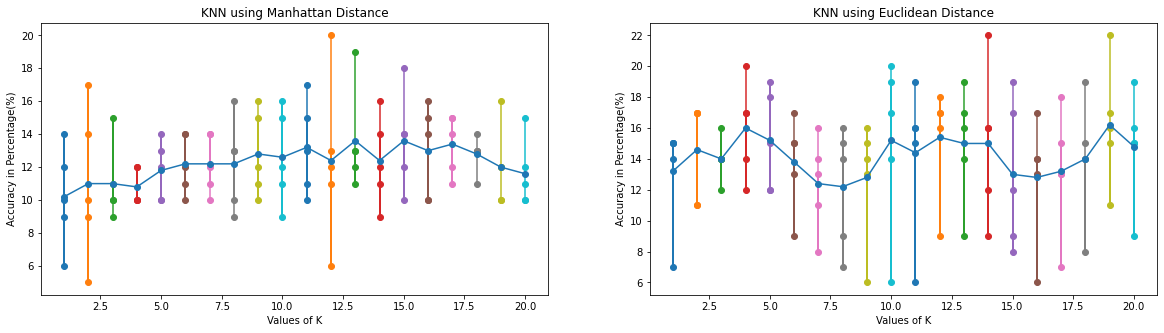

In [27]:
avg1 = []
avg2 = []
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('KNN using Manhattan Distance')

for i in range(len(accuracy)):
    a = np.full((5), i+1, dtype=int)
    l1 = 100*np.array(accuracy[i][0])[:,0]
    avg1.append(np.average(l1))
    plt.plot(a, l1, 'o-')

plt.plot(k, avg1, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Accuracy in Percentage(%)')
plt.subplot(1,2,2)
plt.title('KNN using Euclidean Distance')


for i in range(len(accuracy)):
    a = np.full((5), i+1, dtype=int)
    l2 = 100*np.array(accuracy[i][0])[:,1]
    avg2.append(np.average(l2))
    plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('Values of K')
plt.ylabel('Accuracy in Percentage(%)')
  
plt.show()